# Make cross-correlation plots

In [160]:
#Import functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import corrplot

In [579]:
#Define files which cross-correlation plots will be made for 
#(standard setup is one plot for degree=3 and one for degree=4 but you can always comment out stuff to make only a
#single plot or to compare different things)
#When you define two files, they will be put on the same color scale in the plots
file='data/sph_harmonic_coefficients_full_samples/mystery1_eigen2/spherearray_deg_3.npz'
corrcoeffs,pearsonr=corrplot.corrplot(file,9) #number here is index for which wavelength you want to look at
#file2='data/sph_harmonic_coefficients_full_samples/mystery1_eigen4/spherearray_deg_4.npz'
#corrcoeffs2,pearsonr2=corrplot.corrplot(file2,8)
#print(pearsonr)
print(corrcoeffs)
#plt.imshow(pearsonr)
#plt.colorbar()
pearsonrround=np.zeros(np.shape(pearsonr))
for i in np.arange(np.shape(pearsonr)[0]):
    for j in np.arange(np.shape(pearsonr)[1]):
        pearsonrround[i,j]=round(pearsonr[i,j],3)
print(pearsonrround)
corrcoeffs[corrcoeffs==-1.]=0.
print(pearsonr[abs(corrcoeffs)>0.2],corrcoeffs[abs(corrcoeffs)>0.2])
#print(np.max(abs(corrcoeffs)))

[[-1.         -1.         -1.         -1.        ]
 [-0.99934648 -1.         -1.         -1.        ]
 [ 0.99816076 -0.99754722 -1.         -1.        ]
 [ 0.01030558 -0.01139971  0.01059941 -1.        ]]
[[-1.    -1.    -1.    -1.   ]
 [ 0.    -1.    -1.    -1.   ]
 [ 0.     0.    -1.    -1.   ]
 [ 0.099  0.068  0.09  -1.   ]]
[0. 0. 0.] [-0.99934648  0.99816076 -0.99754722]


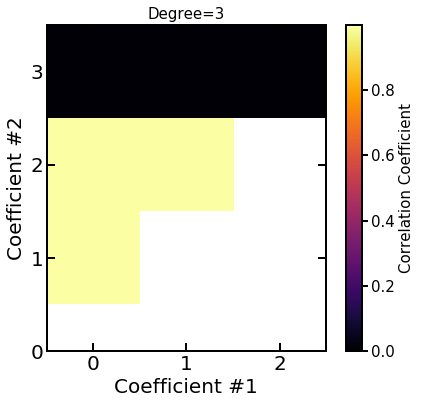

In [580]:
#Making the plot
vmax=np.max(corrcoeffs)#(np.max(corrcoeffs),np.max(corrcoeffs2))) 
vmin=np.min(abs(corrcoeffs))-0.000001#(np.min(abs(corrcoeffs)),np.min(abs(corrcoeffs2))))-0.0001

corrcoeffs[corrcoeffs==-1.]=0.
corrcoeffs=abs(corrcoeffs)
corrcoeffs[corrcoeffs==0.]=-1.
#corrcoeffs2[corrcoeffs2==-1.]=0.
#print(corrcoeffs)
#print(vmin)

palette=plt.cm.inferno
palette.set_under(color='w')

rc('axes',linewidth=2)
plt.figure(figsize=(7,6))
plt.title('Degree=3',fontsize=15)
plt.imshow(corrcoeffs,cmap=palette,vmin=vmin,vmax=vmax,origin='lower')
c=plt.colorbar()
c.ax.tick_params(labelsize=15,width=2,length=6)
c.set_label('Correlation Coefficient',fontsize=15)
plt.xlim((-0.5,np.shape(corrcoeffs)[0]-1.5))
plt.ylim((0.5,np.shape(corrcoeffs)[0]-0.5))
plt.xlabel('Coefficient #1',fontsize=20)
plt.ylabel('Coefficient #2',fontsize=20)
plt.xticks([0,1,2],['0','1','2'])    #unfortunately I couldn't find a shortcut to make the ticks the same length as the cross-correlation plots, so you might have to edit this to get the axes looking nice
plt.yticks([0,1,2,3],['0','1','2','3'])
plt.tick_params(labelsize=20,axis="both",top=True,right=True,width=2,length=8,direction='in')
plt.show()

# plt.figure(figsize=(7,6))
# plt.title('Degree=4',fontsize=15)
# plt.imshow(abs(corrcoeffs2),cmap=palette,vmin=vmin,vmax=vmax,origin='lower')
# c=plt.colorbar()
# c.ax.tick_params(labelsize=15,width=2,length=6)
# c.set_label('Correlation Coefficient',fontsize=15)
# plt.xlim((-0.5,np.shape(corrcoeffs2)[0]-1.5))
# plt.ylim((0.5,np.shape(corrcoeffs2)[0]-0.5))
# plt.xlabel('Coefficient #1',fontsize=20)
# plt.ylabel('Coefficient #2',fontsize=20)
# plt.xticks([0,1,2],['0','1','2'])   #unfortunately I couldn't find a shortcut to make the ticks the same length as the cross-correlation plots, so you might have to edit this to get the axes looking nice
# plt.yticks([0,1,2,3],['0','1','2','3'])
# plt.tick_params(labelsize=20,axis="both",top=True,right=True,width=2,length=8,direction='in')
# plt.show()

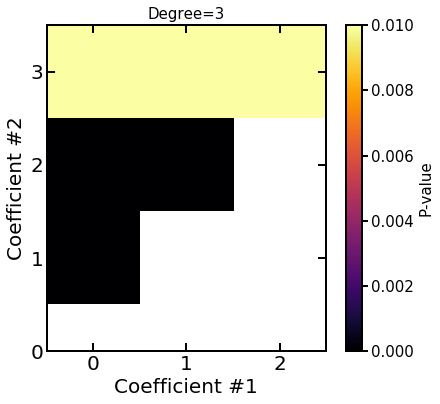

In [581]:
#plotting p values too

#pearsonr[pearsonr>0.5]=1.0-pearsonr[pearsonr>0.5]
#pearsonr2[pearsonr2>0.5]=1.0-pearsonr2[pearsonr2>0.5]

vmax=0.01#np.max((np.max(pearsonr),np.max(pearsonr2))) 
vmin=-1e-10#np.min((np.min(abs(pearsonr)),np.min(abs(pearsonr2))))-0.0001

rc('axes',linewidth=2)
plt.figure(figsize=(7,6))
plt.title('Degree=3',fontsize=15)
plt.imshow(pearsonrround,cmap=palette,vmin=vmin,vmax=vmax,origin='lower')
c=plt.colorbar()
c.ax.tick_params(labelsize=15,width=2,length=6)
c.set_label('P-value',fontsize=15)
plt.xlim((-0.5,np.shape(corrcoeffs)[0]-1.5))
plt.ylim((0.5,np.shape(corrcoeffs)[0]-0.5))
plt.xlabel('Coefficient #1',fontsize=20)
plt.ylabel('Coefficient #2',fontsize=20)
plt.xticks([0,1,2],['0','1','2'])    #unfortunately I couldn't find a shortcut to make the ticks the same length as the cross-correlation plots, so you might have to edit this to get the axes looking nice
plt.yticks([0,1,2,3],['0','1','2','3'])
plt.tick_params(labelsize=20,axis="both",top=True,right=True,width=2,length=8,direction='in')
plt.show()

# plt.figure(figsize=(7,6))
# plt.title('Degree=4',fontsize=15)
# plt.imshow(pearsonr2,cmap=palette,vmin=vmin,vmax=vmax,origin='lower')
# c=plt.colorbar()
# c.ax.tick_params(labelsize=15,width=2,length=6)
# c.set_label('P-value',fontsize=15)
# plt.xlim((-0.5,np.shape(corrcoeffs2)[0]-1.5))
# plt.ylim((0.5,np.shape(corrcoeffs2)[0]-0.5))
# plt.xlabel('Coefficient #1',fontsize=20)
# plt.ylabel('Coefficient #2',fontsize=20)
# plt.xticks([0,1,2],['0','1','2'])   #unfortunately I couldn't find a shortcut to make the ticks the same length as the cross-correlation plots, so you might have to edit this to get the axes looking nice
# plt.yticks([0,1,2,3],['0','1','2','3'])
# plt.tick_params(labelsize=20,axis="both",top=True,right=True,width=2,length=8,direction='in')
# plt.show()